In [7]:
import os, data_new
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_root = "D:\\Datasets\\Respiration\\"

total_patients = data_new.patient_listing(data_root)
print(list(total_patients.keys()))

['ARC', 'HCC_trained', 'HCC_untrained', 'Mammo', 'STATIC']


In [3]:
untrained_list = total_patients["HCC_untrained"]
trained_list = total_patients["HCC_trained"]
mammo_list = total_patients["Mammo"]

(Text(0.5, 1.0, '26839_1fx_field2'),
 Text(0, 0.5, 'Amplitude (mm)'),
 Text(0.5, 0, 'Time (s)'))

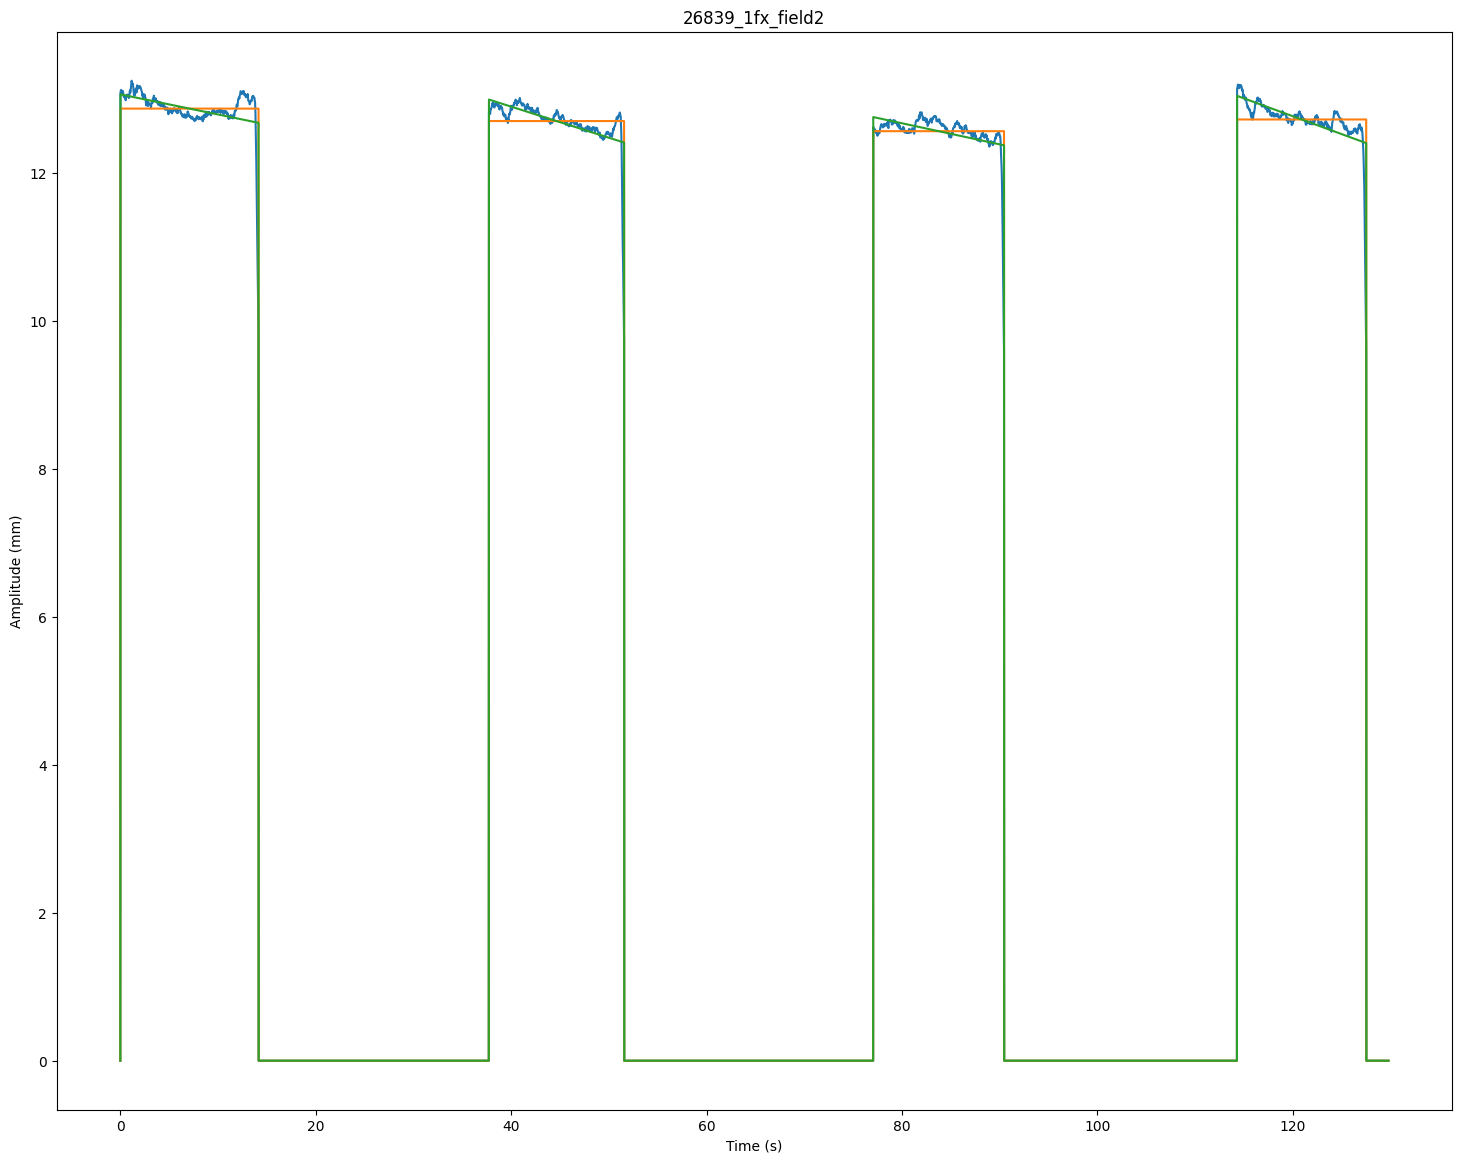

In [13]:
sample_field_data = "D:\\Datasets\\Respiration\\HCC\\non-education\\26839_Breathhold_1.00-1.50_VMAT\\1\\1fx_field2.txt"
filename = os.path.basename(sample_field_data).split(".")[0]
(data_Times, data_Amps), (beam_Times, _) = data_new.read_field_data(sample_field_data)
beam_Times = data_new.beam_modification(beam_Times)
cutted_Amps = data_new.cut_by_beams(data_Times, data_Amps, beam_Times)
enabled_intervals, num_intervals = data_new.beam_enabling_intervals(data_Times, data_Amps, beam_Times)
field_levels, field_lines, field_errors = [], [], []
for intv in range(num_intervals):
    average_level = data_new.avg_lvl_per_interval(enabled_intervals[intv])
    vertical_error = data_new.error_per_interval(enabled_intervals[intv])
    fitted_line = data_new.regression_line(enabled_intervals[intv])
    field_levels.append(average_level)
    field_lines.append(fitted_line)
    field_errors.append(vertical_error)
dilated_avgs, dilated_lines = data_new.dilate_metrics(data_Times, beam_Times, field_levels, field_lines)

plt.figure(figsize=(18, 14))
plt.plot(data_Times, cutted_Amps), plt.plot(data_Times, dilated_avgs), plt.plot(data_Times, dilated_lines)
plt.title(f"26839_{filename}"), plt.ylabel("Amplitude (mm)"), plt.xlabel("Time (s)")

In [12]:
organized_mammo = "E:\\Results\\Respiration\\MTG_4\\Organized_Data\\Mammo\\"

RPD_sum, CV1_sum, STB_sum, CV2_sum = [0]*20, [0]*20, [0]*20, [0]*20
for data in os.listdir(organized_mammo):
    data_path = os.path.join(organized_mammo, data)
    df = pd.read_excel(data_path)
    RPD_sum += df["Inter_RPD"]
    CV1_sum += df["LVL_CV"]
    STB_sum += df["Inter_STB"]
    CV2_sum += df["VD_CV"]
RPD_mean = RPD_sum / 20
CV1_mean = CV1_sum / 20
STB_mean = STB_sum / 20
CV2_mean = CV2_sum / 20

(<Axes: title={'center': 'CV_VD'}, xlabel='Fraction', ylabel='Value'>,
 Text(0.5, 0, 'Fraction'),
 Text(0, 0.5, 'Value'),
 Text(0.5, 1.0, 'CV_VD'))

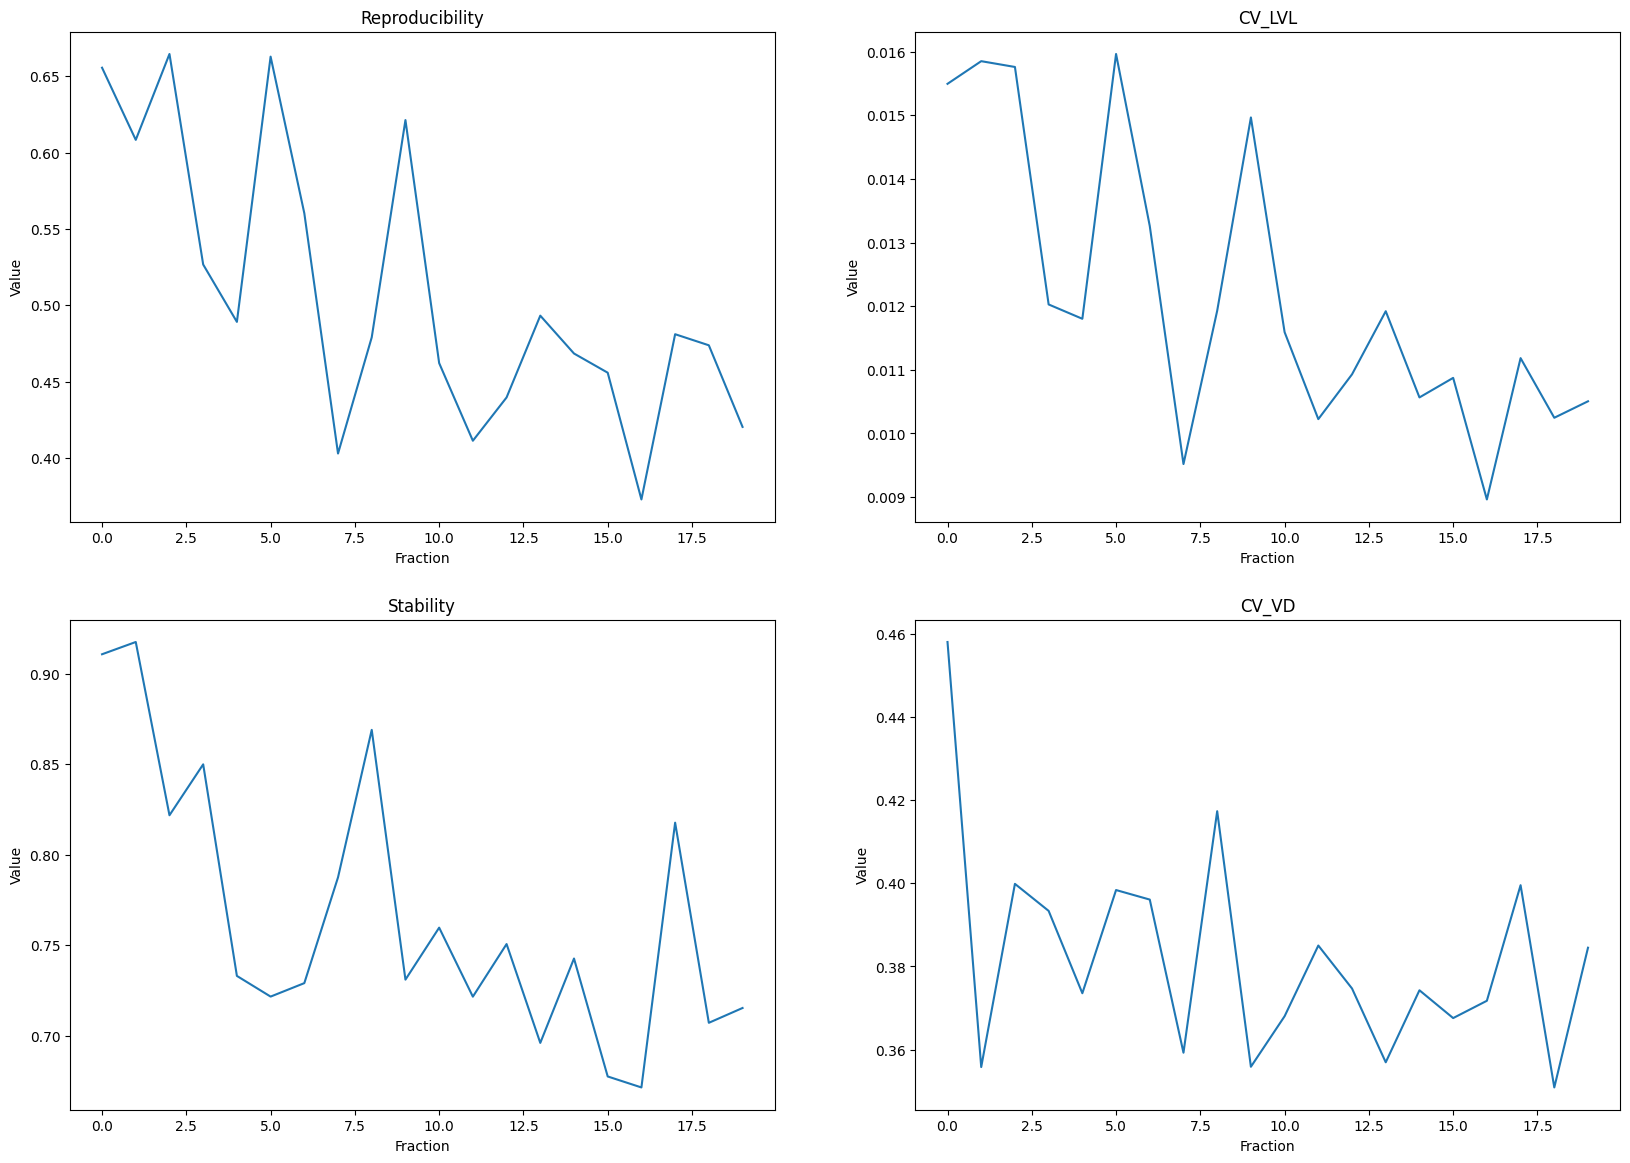

In [17]:
x = range(20)
plt.figure(figsize=(20, 14))
plt.subplot(221), plt.plot(x, RPD_mean), plt.xlabel("Fraction"), plt.ylabel("Value"), plt.title("Reproducibility")
plt.subplot(222), plt.plot(x, CV1_mean), plt.xlabel("Fraction"), plt.ylabel("Value"), plt.title("CV_LVL")
plt.subplot(223), plt.plot(x, STB_mean), plt.xlabel("Fraction"), plt.ylabel("Value"), plt.title("Stability")
plt.subplot(224), plt.plot(x, CV2_mean), plt.xlabel("Fraction"), plt.ylabel("Value"), plt.title("CV_VD")